In [2]:
import os
import requests
from pprint import pprint
import json
from datetime import datetime,time, timedelta
import glob
import time
import pandas as pd
import logging
import urllib.request
import logging
import logging.handlers
import boto3
import botocore
import botocore.session
import plotly as py
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import calendar
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF

In [3]:
with zipfile.ZipFile('train_2016.zip') as zip:
    with zip.open('train_2016.csv') as myZip:
        b = pd.read_csv(myZip) 

In [4]:
with zipfile.ZipFile('properties_2016.zip') as zip:
    with zip.open('properties_2016.csv') as myZip:
        a = pd.read_csv(myZip) 

C:\Users\AkilP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df= pd.merge(b,a, on='parcelid', how='left')

In [6]:
df['transactiondate']=pd.to_datetime(df['transactiondate'])
df['MONTH'] = pd.to_datetime(df['transactiondate']).dt.month
df['YEAR']  =   pd.to_datetime(df['transactiondate']).dt.year


In [7]:
monthly= df.groupby(['MONTH'])['YEAR'].count()
monthly1= pd.DataFrame(monthly).reset_index()
monthly1['MONTH'] = monthly1['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [8]:
import plotly 
plotly.tools.set_credentials_file(username='dhruvkanakia', api_key='qHQ6b8DwjCTt3UUxTxfc')

In [9]:

trace = go.Scatter(x = monthly1['MONTH'], y = monthly1['YEAR'],
                  name='Number of Transactions')
layout = go.Layout(title='Number of Transactions over each month',
                   plot_bgcolor='rgb(180, 180,180)', 
                   showlegend=True)
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='apple-stock-prices')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dhruvkanakia/0 or inside your plot.ly account where it is named 'apple-stock-prices'


### So we can clearly see that there are highest number of transactinos between May and September with highest being in JUNE. Chances are that this is the period when move in and move out's normally take place.

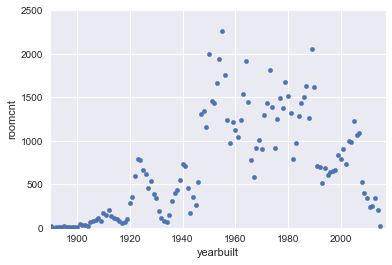

In [10]:
most_number_built= df[['yearbuilt','roomcnt']]
most_number_built= most_number_built.groupby('yearbuilt').count().reset_index()
%matplotlib inline
most_number_built.plot(kind='scatter',x='yearbuilt',y='roomcnt',xlim=(1890,2017),ylim=(0,2500))

In [11]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

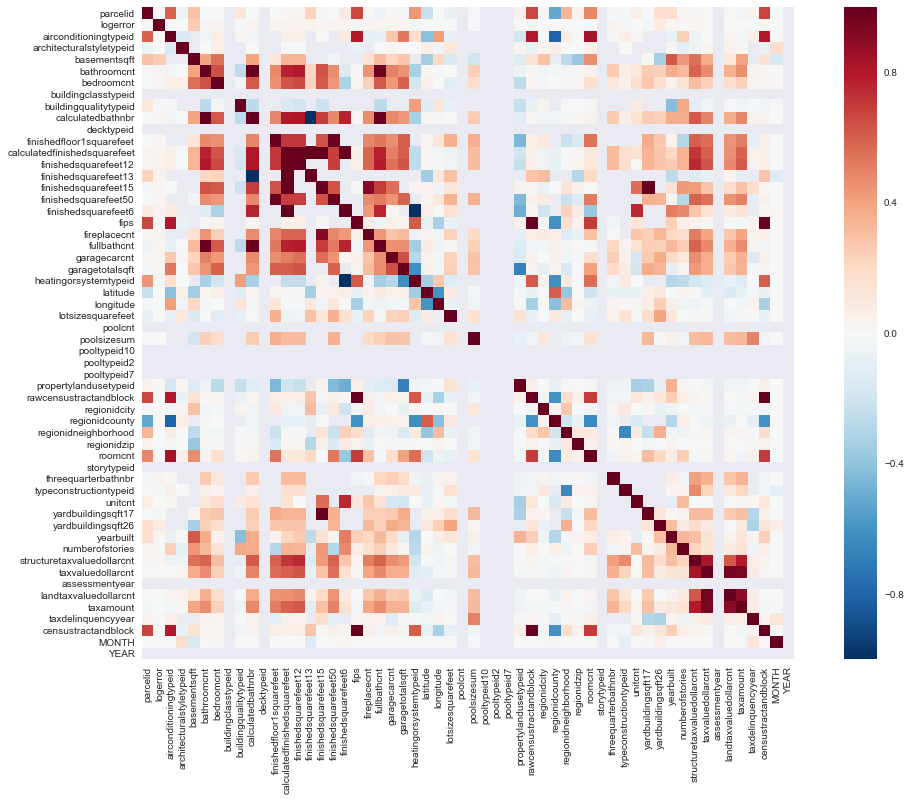

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(18,12 ))
sns.heatmap(corrmat, vmax=.8, square=True);

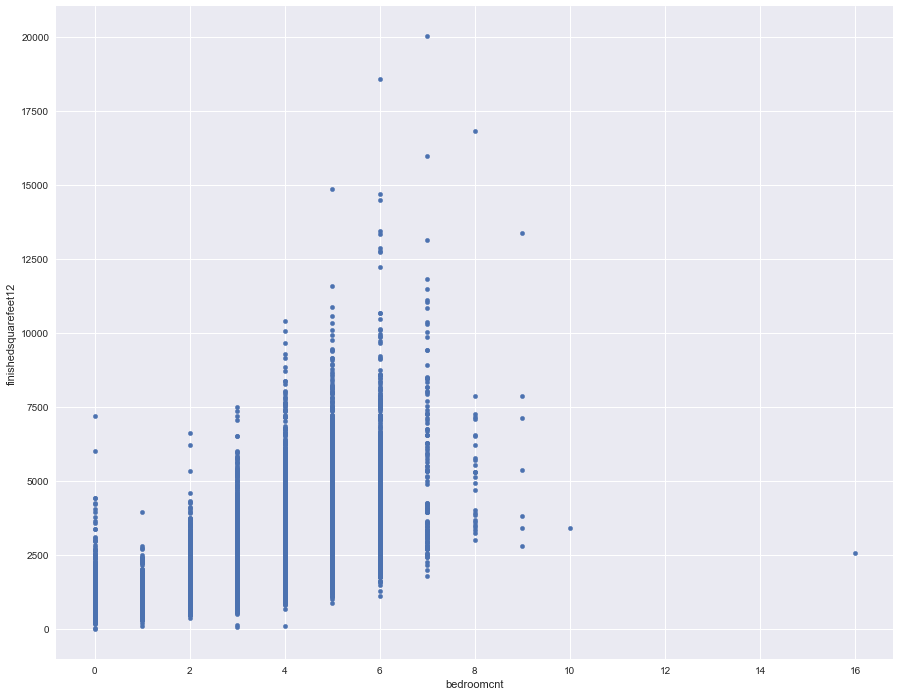

In [14]:
df.plot(kind='scatter',x='bedroomcnt',y='finishedsquarefeet12',figsize=(15,12))


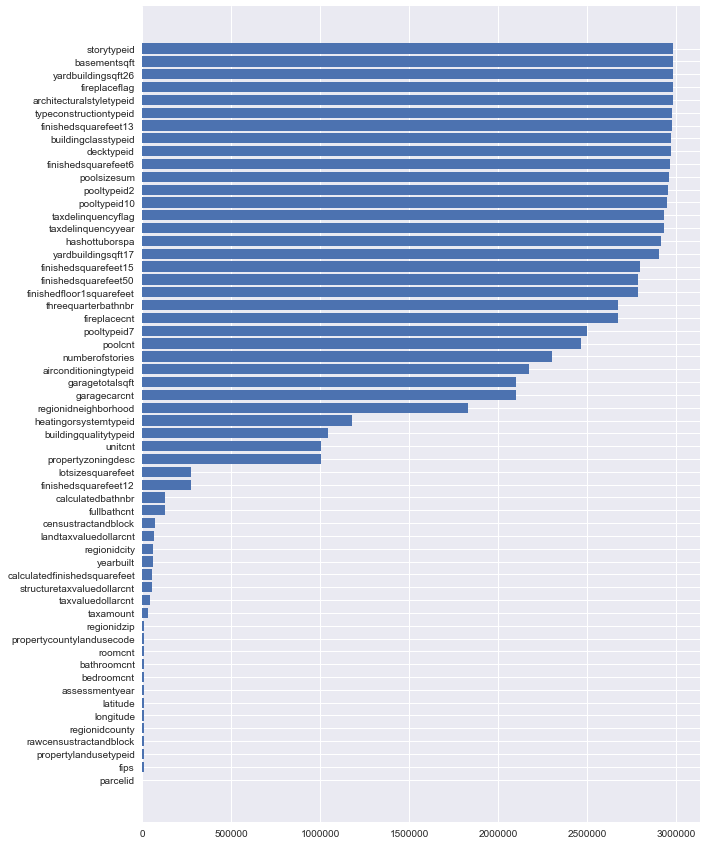

In [15]:
missing_df = pd.DataFrame({'Missing': a.isnull().sum()})
missing_df.sort_values(by="Missing", ascending=True, inplace=True)

a1 = np.arange(missing_df.shape[0])
fig,ax = plt.subplots(figsize=(10,15))
ax.barh(a1, missing_df['Missing'])
ax.set_yticks(a1)
ax.set_yticklabels(missing_df.index)
plt.show()

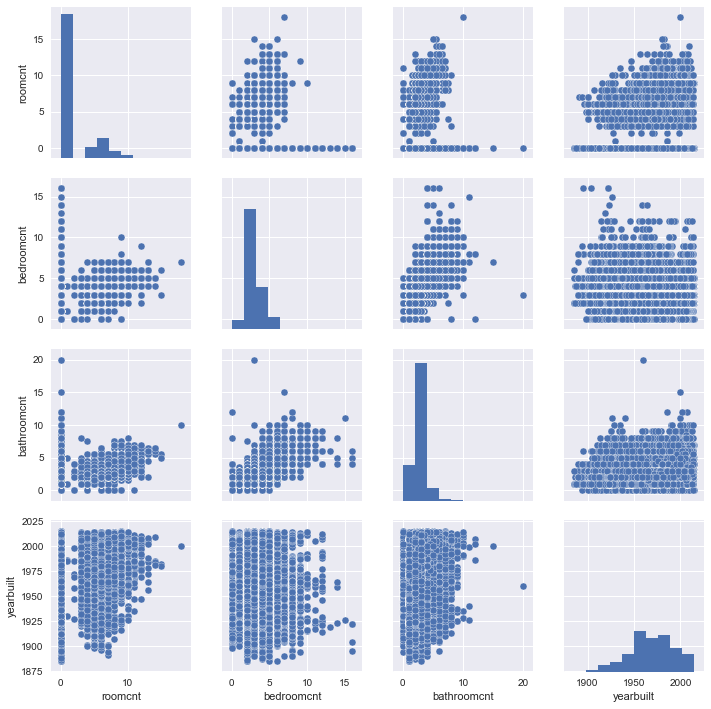

In [18]:
sns.pairplot(df.loc[:,['roomcnt','bedroomcnt','bathroomcnt','yearbuilt']].dropna())